<a href="https://colab.research.google.com/github/shrutiza/Farming/blob/main/Crop_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/crop_yield_dataset.csv')

df

df.dropna(inplace = True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df.head()

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667


In [5]:
df.min()

,0
Date,2014-01-01
Crop_Type,Barley
Soil_Type,Clay
Soil_pH,5.5
Temperature,-3.540176
Humidity,45.851089
Wind_Speed,-3.388906
N,45.0
P,36.0
K,27.0


In [6]:
df.max()

,0
Date,2023-12-31
Crop_Type,Wheat
Soil_Type,Sandy
Soil_pH,8.0
Temperature,54.148911
Humidity,80.0
Wind_Speed,22.606078
N,91.0
P,72.0
K,60.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36520 entries, 0 to 36519
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          36520 non-null  object 
 1   Crop_Type     36520 non-null  object 
 2   Soil_Type     36520 non-null  object 
 3   Soil_pH       36520 non-null  float64
 4   Temperature   36520 non-null  float64
 5   Humidity      36520 non-null  float64
 6   Wind_Speed    36520 non-null  float64
 7   N             36520 non-null  float64
 8   P             36520 non-null  float64
 9   K             36520 non-null  float64
 10  Crop_Yield    36520 non-null  float64
 11  Soil_Quality  36520 non-null  float64
dtypes: float64(9), object(3)
memory usage: 3.3+ MB


In [8]:
df.to_csv('crop_yield_dataset.csv')

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in df:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i].astype(str))
  else:
    continue

X = df.drop('Crop_Type', axis = 1)
y = df['Crop_Type']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score

In [14]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(y_pred[:65])

from sklearn.metrics import recall_score, accuracy_score, classification_report

accuracy = accuracy_score(y_pred, y_test)


[0 7 9 5 0 4 0 0 6 6 4 0 0 1 8 5 3 6 6 6 5 2 6 0 4 7 1 0 2 4 9 6 3 1 3 6 0
 2 4 6 4 4 8 7 9 6 1 4 4 2 7 0 6 1 7 1 7 3 0 4 1 3 4 8 9]


0.8995618838992333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       909
           1       1.00      1.00      1.00       939
           2       1.00      1.00      1.00       859
           3       0.53      0.50      0.51       971
           4       1.00      1.00      1.00       947
           5       1.00      1.00      1.00       877
           6       1.00      1.00      1.00       927
           7       1.00      1.00      1.00       898
           8       1.00      1.00      1.00       923
           9       0.48      0.51      0.50       880

    accuracy                           0.90      9130
   macro avg       0.90      0.90      0.90      9130
weighted avg       0.90      0.90      0.90      9130

F1 Score:  0.9008957449560157
[[909   0   0   0   0   0   0   0   0   0]
 [  0 939   0   0   0   0   0   0   0   0]
 [  0   0 859   0   0   0   0   0   0   0]
 [  0   0   0 481   0   0   0   0   0 427]
 [  0   0   0   0 94

Text(0, 0.5, 'True')

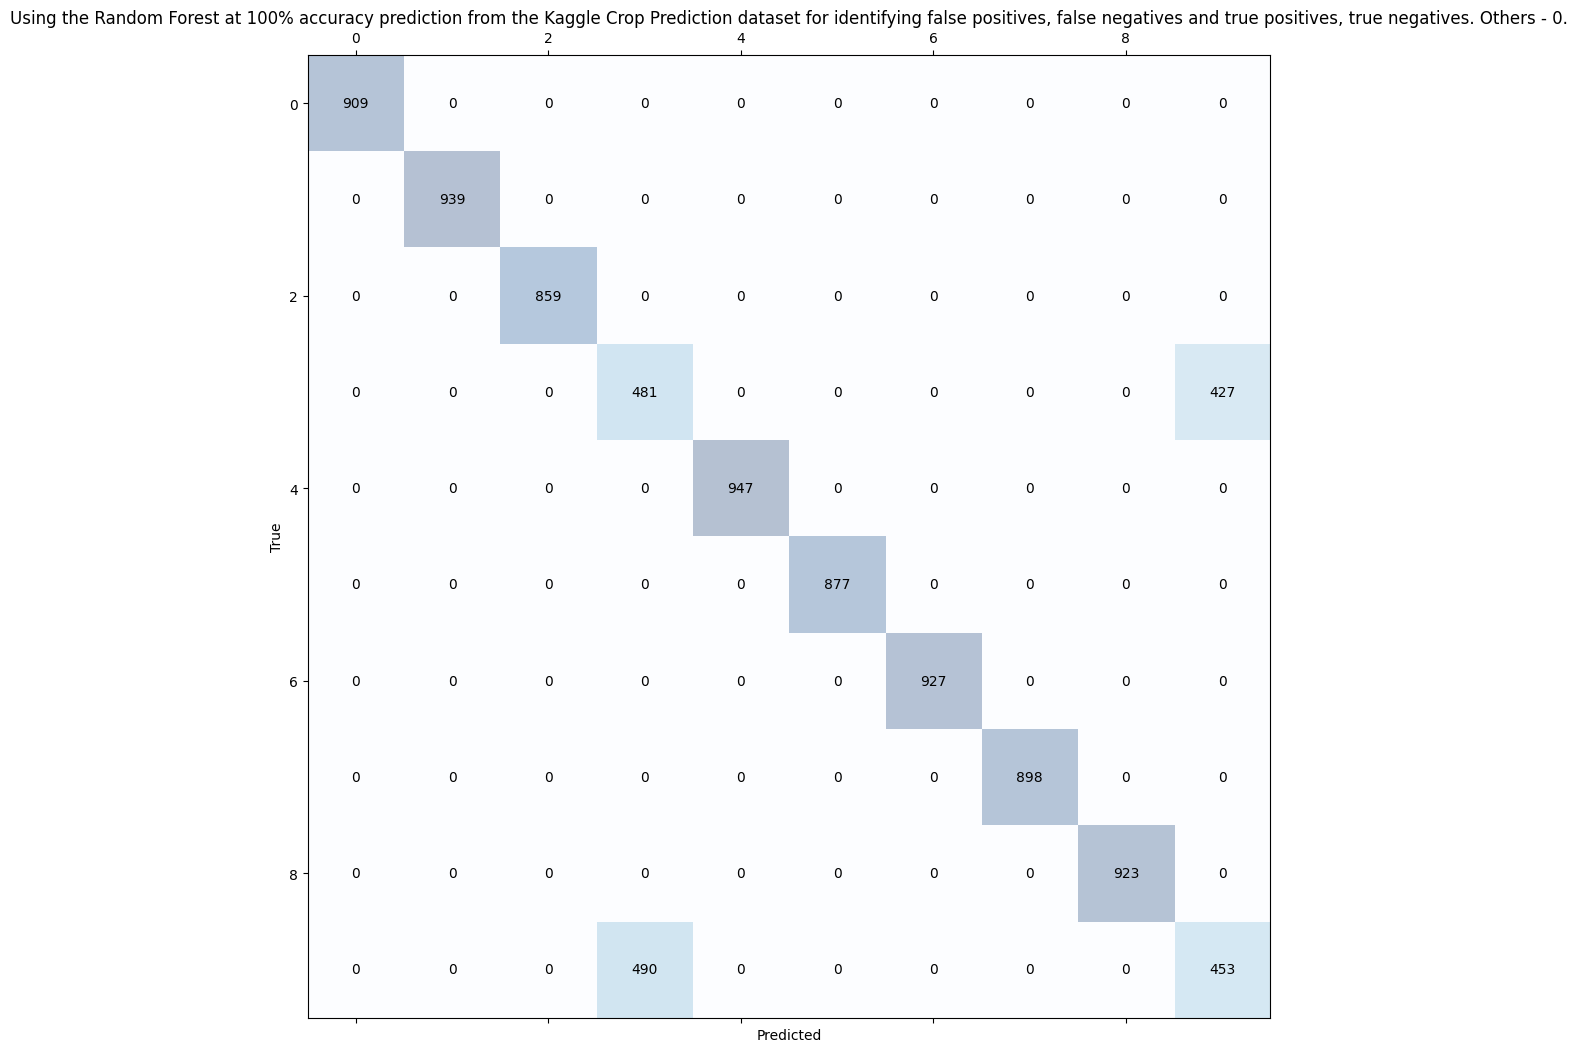

In [17]:
print(accuracy)

print(classification_report(y_pred, y_test))
print('F1 Score: ', f1_score(y_pred, y_test, average = 'macro'))

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(12.5, 12.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.30)
for i in range (confmat.shape[0]):
  for j in range (confmat.shape[1]):
    ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.title("Using the Random Forest at 100% accuracy prediction from the Kaggle Crop Prediction dataset for identifying false positives, false negatives and true positives, true negatives. Others - 0.")
plt.xlabel('Predicted')
plt.ylabel('True')

In [18]:
df.to_csv('data_new.csv')

In [23]:
y=0; a=1; b=2; c=3; d=4; e=5; f=6; g=7; h=8; i=9; j=10;

In [21]:
import pickle

In [25]:
with open('crop_yield_model.pkl', 'wb') as fh:
  pickle.dump(model, fh)